## **Import Libraries**

In [175]:
!pip install ydata_profiling

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#from ydata_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import numpy as np

In [261]:
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

In [275]:
airlines = pd.read_csv("/content/airlines.csv")

In [276]:
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


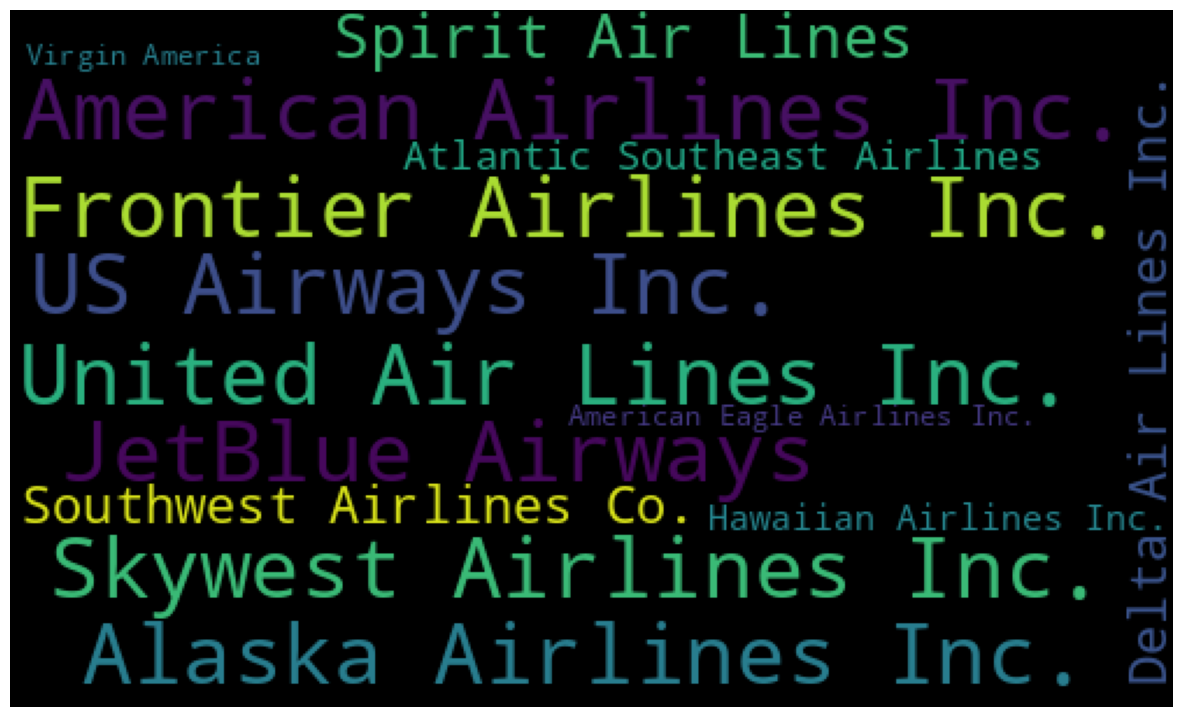

In [277]:

stopwords = set(STOPWORDS)

wordcloud = (WordCloud(width=500, height=300, relative_scaling=0.5, stopwords=stopwords).generate_from_frequencies(airlines['AIRLINE'].value_counts().head(35)))
fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [179]:
airlines.columns

Index(['IATA_CODE', 'AIRLINE'], dtype='object')

In [180]:
airlines.shape

(14, 2)

In [181]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes


In [269]:
airports = pd.read_csv("/content/airports.csv")

In [270]:
airports.head(30)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [184]:
airports.columns

Index(['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

In [185]:
airports.shape

(322, 7)

In [285]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  319 non-null    object 
 1   AIRPORT    319 non-null    object 
 2   CITY       319 non-null    object 
 3   STATE      319 non-null    object 
 4   COUNTRY    319 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 19.9+ KB


In [187]:
flights = pd.read_csv("/content/flights.csv")

In [188]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1.0,4.0,AS,98.0,N407AS,ANC,SEA,5.0,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1.0,4.0,AA,2336.0,N3KUAA,LAX,PBI,10.0,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1.0,4.0,US,840.0,N171US,SFO,CLT,20.0,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1.0,4.0,AA,258.0,N3HYAA,LAX,MIA,20.0,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1.0,4.0,AS,135.0,N527AS,SEA,ANC,25.0,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [190]:
flights.shape

(488615, 31)

In [191]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488615 entries, 0 to 488614
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 488615 non-null  int64  
 1   MONTH                488615 non-null  int64  
 2   DAY                  488614 non-null  float64
 3   DAY_OF_WEEK          488614 non-null  float64
 4   AIRLINE              488614 non-null  object 
 5   FLIGHT_NUMBER        488614 non-null  float64
 6   TAIL_NUMBER          485159 non-null  object 
 7   ORIGIN_AIRPORT       488614 non-null  object 
 8   DESTINATION_AIRPORT  488614 non-null  object 
 9   SCHEDULED_DEPARTURE  488614 non-null  float64
 10  DEPARTURE_TIME       473875 non-null  float64
 11  DEPARTURE_DELAY      473875 non-null  float64
 12  TAXI_OUT             473613 non-null  float64
 13  WHEELS_OFF           473613 non-null  float64
 14  SCHEDULED_TIME       488613 non-null  float64
 15  ELAPSED_TIME     

## Merge Airlines and flights data

In [192]:
airlines = airlines.rename(columns={'AIRLINE': 'AL_FULLNAME', 'IATA_CODE': 'AIRLINE'})

In [193]:
#convert column names to lowercase
flights.columns = flights.columns.str.lower()
airlines.columns = airlines.columns.str.lower()
airports.columns = airports.columns.str.lower()

In [194]:
flights.columns

Index(['year', 'month', 'day', 'day_of_week', 'airline', 'flight_number',
       'tail_number', 'origin_airport', 'destination_airport',
       'scheduled_departure', 'departure_time', 'departure_delay', 'taxi_out',
       'wheels_off', 'scheduled_time', 'elapsed_time', 'air_time', 'distance',
       'wheels_on', 'taxi_in', 'scheduled_arrival', 'arrival_time',
       'arrival_delay', 'diverted', 'cancelled', 'cancellation_reason',
       'air_system_delay', 'security_delay', 'airline_delay',
       'late_aircraft_delay', 'weather_delay'],
      dtype='object')

In [195]:
airlines.columns

Index(['airline', 'al_fullname'], dtype='object')

In [196]:
# merge airlines and flights data to get full names of airlines
flights_merged = flights.merge(airlines, how = 'left', on = 'airline')

In [197]:
flights_merged.head()

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay,al_fullname
0,2015,1,1.0,4.0,AS,98.0,N407AS,ANC,SEA,5.0,...,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
1,2015,1,1.0,4.0,AA,2336.0,N3KUAA,LAX,PBI,10.0,...,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
2,2015,1,1.0,4.0,US,840.0,N171US,SFO,CLT,20.0,...,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,US Airways Inc.
3,2015,1,1.0,4.0,AA,258.0,N3HYAA,LAX,MIA,20.0,...,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
4,2015,1,1.0,4.0,AS,135.0,N527AS,SEA,ANC,25.0,...,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.


In [198]:
flights_merged.columns

Index(['year', 'month', 'day', 'day_of_week', 'airline', 'flight_number',
       'tail_number', 'origin_airport', 'destination_airport',
       'scheduled_departure', 'departure_time', 'departure_delay', 'taxi_out',
       'wheels_off', 'scheduled_time', 'elapsed_time', 'air_time', 'distance',
       'wheels_on', 'taxi_in', 'scheduled_arrival', 'arrival_time',
       'arrival_delay', 'diverted', 'cancelled', 'cancellation_reason',
       'air_system_delay', 'security_delay', 'airline_delay',
       'late_aircraft_delay', 'weather_delay', 'al_fullname'],
      dtype='object')

## Merge flights_merged and Airport Data

In [199]:
#merge origin airport data onto main df
merged_df = pd.merge(flights_merged, airports, left_on='origin_airport', right_on='iata_code', how='left')
merged_df.rename(columns={'airport': 'origin_airport_name', 'city': 'origin_city', 'state': 'origin_state', 'country': 'origin_country', 'latitude': 'origin_latitude', 'longitude': 'origin_longitude'}, inplace=True)
merged_df.drop('iata_code', axis=1, inplace=True)

In [200]:
merged_df.head()

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,airline_delay,late_aircraft_delay,weather_delay,al_fullname,origin_airport_name,origin_city,origin_state,origin_country,origin_latitude,origin_longitude
0,2015,1,1.0,4.0,AS,98.0,N407AS,ANC,SEA,5.0,...,NaN,NaN,NaN,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
1,2015,1,1.0,4.0,AA,2336.0,N3KUAA,LAX,PBI,10.0,...,NaN,NaN,NaN,American Airlines Inc.,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
2,2015,1,1.0,4.0,US,840.0,N171US,SFO,CLT,20.0,...,NaN,NaN,NaN,US Airways Inc.,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484
3,2015,1,1.0,4.0,AA,258.0,N3HYAA,LAX,MIA,20.0,...,NaN,NaN,NaN,American Airlines Inc.,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
4,2015,1,1.0,4.0,AS,135.0,N527AS,SEA,ANC,25.0,...,NaN,NaN,NaN,Alaska Airlines Inc.,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931


In [201]:
merged_df.columns

Index(['year', 'month', 'day', 'day_of_week', 'airline', 'flight_number',
       'tail_number', 'origin_airport', 'destination_airport',
       'scheduled_departure', 'departure_time', 'departure_delay', 'taxi_out',
       'wheels_off', 'scheduled_time', 'elapsed_time', 'air_time', 'distance',
       'wheels_on', 'taxi_in', 'scheduled_arrival', 'arrival_time',
       'arrival_delay', 'diverted', 'cancelled', 'cancellation_reason',
       'air_system_delay', 'security_delay', 'airline_delay',
       'late_aircraft_delay', 'weather_delay', 'al_fullname',
       'origin_airport_name', 'origin_city', 'origin_state', 'origin_country',
       'origin_latitude', 'origin_longitude'],
      dtype='object')

In [202]:
# merge destination airport data onto main df
merged_df = pd.merge(merged_df, airports, left_on='destination_airport', right_on='iata_code', how='left')
merged_df.rename(columns={'airport': 'destination_airport_name', 'city': 'destination_city', 'state': 'destination_state', 'country': 'destination_country', 'latitude': 'destination_latitude', 'longitude': 'destination_longitude'}, inplace=True)


In [203]:
merged_df.head()

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,origin_country,origin_latitude,origin_longitude,iata_code,destination_airport_name,destination_city,destination_state,destination_country,destination_latitude,destination_longitude
0,2015,1,1.0,4.0,AS,98.0,N407AS,ANC,SEA,5.0,...,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1.0,4.0,AA,2336.0,N3KUAA,LAX,PBI,10.0,...,USA,33.94254,-118.40807,PBI,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559
2,2015,1,1.0,4.0,US,840.0,N171US,SFO,CLT,20.0,...,USA,37.61900,-122.37484,CLT,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
3,2015,1,1.0,4.0,AA,258.0,N3HYAA,LAX,MIA,20.0,...,USA,33.94254,-118.40807,MIA,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
4,2015,1,1.0,4.0,AS,135.0,N527AS,SEA,ANC,25.0,...,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619


In [204]:
merged_df.drop('iata_code', axis=1, inplace=True)

df = merged_df

In [205]:
df.head()

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,origin_state,origin_country,origin_latitude,origin_longitude,destination_airport_name,destination_city,destination_state,destination_country,destination_latitude,destination_longitude
0,2015,1,1.0,4.0,AS,98.0,N407AS,ANC,SEA,5.0,...,AK,USA,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1.0,4.0,AA,2336.0,N3KUAA,LAX,PBI,10.0,...,CA,USA,33.94254,-118.40807,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559
2,2015,1,1.0,4.0,US,840.0,N171US,SFO,CLT,20.0,...,CA,USA,37.61900,-122.37484,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
3,2015,1,1.0,4.0,AA,258.0,N3HYAA,LAX,MIA,20.0,...,CA,USA,33.94254,-118.40807,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
4,2015,1,1.0,4.0,AS,135.0,N527AS,SEA,ANC,25.0,...,WA,USA,47.44898,-122.30931,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619


## Analysing Data Inconsistencies

In [206]:
#get info on columns types and number of null and unique values

df_dtypes = pd.DataFrame(df.dtypes, columns = ['dtypes'])
null_count = df.isnull().sum().rename('null values')
null_pct = (df.isnull().sum() / df.shape[0] * 100).rename('null percent')
df_unique = df.nunique(axis=0).rename('unique vals')

result = pd.concat([df_dtypes, null_count, null_pct, df_unique], axis=1).T
result

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,origin_state,origin_country,origin_latitude,origin_longitude,destination_airport_name,destination_city,destination_state,destination_country,destination_latitude,destination_longitude
dtypes,int64,int64,float64,float64,object,float64,object,object,object,float64,...,object,object,float64,float64,object,object,object,object,float64,float64
null values,0,0,1,1,1,1,3456,1,1,1,...,1,1,293,293,1,1,1,1,291,291
null percent,0.0,0.0,0.000205,0.000205,0.000205,0.000205,0.707305,0.000205,0.000205,0.000205,...,0.000205,0.000205,0.059965,0.059965,0.000205,0.000205,0.000205,0.000205,0.059556,0.059556
unique vals,1,2,31,7,14,6345,4408,313,313,1177,...,54,1,310,310,313,299,54,1,310,310


In [207]:
# Generate the profile report
#report = ProfileReport(df)

# Save the report to a file
#report.to_file("data_profile_report.html")

# Alternatively, you can also display the report directly
#report.to_notebook_iframe()

In [208]:
#drop columns with little variability/not useful in prediciton/visualization or redundant
df = df.drop(columns = ['flight_number', 'tail_number', 'taxi_out',
                   'wheels_off', 'air_time', 'taxi_in', 'diverted',
                  'cancellation_reason', 'air_system_delay', 'security_delay',
                   'airline_delay', 'late_aircraft_delay', 'weather_delay', 'origin_country', 'destination_country'])

In [209]:
df.head()

,year,month,day,day_of_week,airline,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,...,origin_airport_name,origin_city,origin_state,origin_latitude,origin_longitude,destination_airport_name,destination_city,destination_state,destination_latitude,destination_longitude
0,2015,1,1.0,4.0,AS,ANC,SEA,5.0,2354.0,-11.0,...,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931
1,2015,1,1.0,4.0,AA,LAX,PBI,10.0,2.0,-8.0,...,Los Angeles International Airport,Los Angeles,CA,33.94254,-118.40807,Palm Beach International Airport,West Palm Beach,FL,26.68316,-80.09559
2,2015,1,1.0,4.0,US,SFO,CLT,20.0,18.0,-2.0,...,San Francisco International Airport,San Francisco,CA,37.61900,-122.37484,Charlotte Douglas International Airport,Charlotte,NC,35.21401,-80.94313
3,2015,1,1.0,4.0,AA,LAX,MIA,20.0,15.0,-5.0,...,Los Angeles International Airport,Los Angeles,CA,33.94254,-118.40807,Miami International Airport,Miami,FL,25.79325,-80.29056
4,2015,1,1.0,4.0,AS,SEA,ANC,25.0,24.0,-1.0,...,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619


In [210]:
#create "date", "week_number", "sched_hour", and "dow_name" columns
df['date'] = pd.to_datetime(df[['year','month', 'day']])
df['week_number'] = df['date'].dt.strftime('%U')
df['dow_name'] = df['date'].dt.strftime('%A')


#function that assigns season based on month. May be useful for visualization
def season_cat(x):
    if x in [12,1,2]:
        return 'winter'
    elif x in [3,4,5]:
        return 'spring'
    elif x in [6,7,8]:
        return 'summer'
    return 'autumn'

#create season type column and count # of short/med/long flights
df['season'] = df['month'].apply(season_cat)

df = df.drop(columns = 'year')

In [211]:
#check if there are airports in flights that are not in airports.'set' creates unique list of things
unmatched_origin_airports = set(df['origin_airport']) - set(airports['iata_code'])
unmatched_destination_airports = set(df['destination_airport']) - set(airports['iata_code'])
len(unmatched_origin_airports)

1

In [212]:
#remove observations where airport is an integer
import re
import pandas as pd

# Check if 'origin_airport' or 'destination_airport' can be converted to numeric values
is_numeric = pd.to_numeric(df['origin_airport'], errors='coerce').notna() | pd.to_numeric(df['destination_airport'], errors='coerce').notna()

# Drop the rows where either 'origin_airport' or 'destination_airport' contains integer values
df = df[~is_numeric]

In [213]:
df.head(10)

,month,day,day_of_week,airline,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,scheduled_time,...,origin_longitude,destination_airport_name,destination_city,destination_state,destination_latitude,destination_longitude,date,week_number,dow_name,season
0,1,1.0,4.0,AS,ANC,SEA,5.0,2354.0,-11.0,205.0,...,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931,2015-01-01,00,Thursday,winter
1,1,1.0,4.0,AA,LAX,PBI,10.0,2.0,-8.0,280.0,...,-118.40807,Palm Beach International Airport,West Palm Beach,FL,26.68316,-80.09559,2015-01-01,00,Thursday,winter
2,1,1.0,4.0,US,SFO,CLT,20.0,18.0,-2.0,286.0,...,-122.37484,Charlotte Douglas International Airport,Charlotte,NC,35.21401,-80.94313,2015-01-01,00,Thursday,winter
3,1,1.0,4.0,AA,LAX,MIA,20.0,15.0,-5.0,285.0,...,-118.40807,Miami International Airport,Miami,FL,25.79325,-80.29056,2015-01-01,00,Thursday,winter
4,1,1.0,4.0,AS,SEA,ANC,25.0,24.0,-1.0,235.0,...,-122.30931,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,2015-01-01,00,Thursday,winter
5,1,1.0,4.0,DL,SFO,MSP,25.0,20.0,-5.0,217.0,...,-122.37484,Minneapolis-Saint Paul International Airport,Minneapolis,MN,44.88055,-93.21692,2015-01-01,00,Thursday,winter
6,1,1.0,4.0,NK,LAS,MSP,25.0,19.0,-6.0,181.0,...,-115.15233,Minneapolis-Saint Paul International Airport,Minneapolis,MN,44.88055,-93.21692,2015-01-01,00,Thursday,winter
7,1,1.0,4.0,US,LAX,CLT,30.0,44.0,14.0,273.0,...,-118.40807,Charlotte Douglas International Airport,Charlotte,NC,35.21401,-80.94313,2015-01-01,00,Thursday,winter
8,1,1.0,4.0,AA,SFO,DFW,30.0,19.0,-11.0,195.0,...,-122.37484,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,32.89595,-97.03720,2015-01-01,00,Thursday,winter
9,1,1.0,4.0,DL,LAS,ATL,30.0,33.0,3.0,221.0,...,-115.15233,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,33.64044,-84.42694,2015-01-01,00,Thursday,winter


Below we write a script to transform the arrival and departure times from continuous floats to time objects e.g. 1730 --> 17:30

In [214]:
from datetime import datetime

# write a function to convert float time to string time format
def convert_float_time(float_time):
    time_string = str(float_time).split('.')[0].zfill(4) # ensure 4 characters

    try:
        hour = int(time_string[:-2]) #first two will be the hour
        minute = int(time_string[-2:]) #last will be minutes

        if hour >= 24:
            hour = hour % 24

        return f"{hour:02d}:{minute:02d}:00"
    except ValueError: #return none where there are null values
        return None

# Apply the conversion function to the arrival_time column
df['arrival_time'] = df['arrival_time'].apply(convert_float_time)
df['departure_time'] = df['departure_time'].apply(convert_float_time)
df['scheduled_departure'] = df['scheduled_departure'].apply(convert_float_time)

# Combine date and scheduled departure columns into a single datetime column
df['scheduled_departure_datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['scheduled_departure'])

#get hour from the scheduled departure time
df['sched_hour'] = df['scheduled_departure_datetime'].dt.strftime('%H')

In [215]:
df.head(10)

,month,day,day_of_week,airline,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,scheduled_time,...,destination_city,destination_state,destination_latitude,destination_longitude,date,week_number,dow_name,season,scheduled_departure_datetime,sched_hour
0,1,1.0,4.0,AS,ANC,SEA,00:05:00,23:54:00,-11.0,205.0,...,Seattle,WA,47.44898,-122.30931,2015-01-01,00,Thursday,winter,2015-01-01 00:05:00,00
1,1,1.0,4.0,AA,LAX,PBI,00:10:00,00:02:00,-8.0,280.0,...,West Palm Beach,FL,26.68316,-80.09559,2015-01-01,00,Thursday,winter,2015-01-01 00:10:00,00
2,1,1.0,4.0,US,SFO,CLT,00:20:00,00:18:00,-2.0,286.0,...,Charlotte,NC,35.21401,-80.94313,2015-01-01,00,Thursday,winter,2015-01-01 00:20:00,00
3,1,1.0,4.0,AA,LAX,MIA,00:20:00,00:15:00,-5.0,285.0,...,Miami,FL,25.79325,-80.29056,2015-01-01,00,Thursday,winter,2015-01-01 00:20:00,00
4,1,1.0,4.0,AS,SEA,ANC,00:25:00,00:24:00,-1.0,235.0,...,Anchorage,AK,61.17432,-149.99619,2015-01-01,00,Thursday,winter,2015-01-01 00:25:00,00
5,1,1.0,4.0,DL,SFO,MSP,00:25:00,00:20:00,-5.0,217.0,...,Minneapolis,MN,44.88055,-93.21692,2015-01-01,00,Thursday,winter,2015-01-01 00:25:00,00
6,1,1.0,4.0,NK,LAS,MSP,00:25:00,00:19:00,-6.0,181.0,...,Minneapolis,MN,44.88055,-93.21692,2015-01-01,00,Thursday,winter,2015-01-01 00:25:00,00
7,1,1.0,4.0,US,LAX,CLT,00:30:00,00:44:00,14.0,273.0,...,Charlotte,NC,35.21401,-80.94313,2015-01-01,00,Thursday,winter,2015-01-01 00:30:00,00
8,1,1.0,4.0,AA,SFO,DFW,00:30:00,00:19:00,-11.0,195.0,...,Dallas-Fort Worth,TX,32.89595,-97.03720,2015-01-01,00,Thursday,winter,2015-01-01 00:30:00,00
9,1,1.0,4.0,DL,LAS,ATL,00:30:00,00:33:00,3.0,221.0,...,Atlanta,GA,33.64044,-84.42694,2015-01-01,00,Thursday,winter,2015-01-01 00:30:00,00


## Exploratory Data Analysis

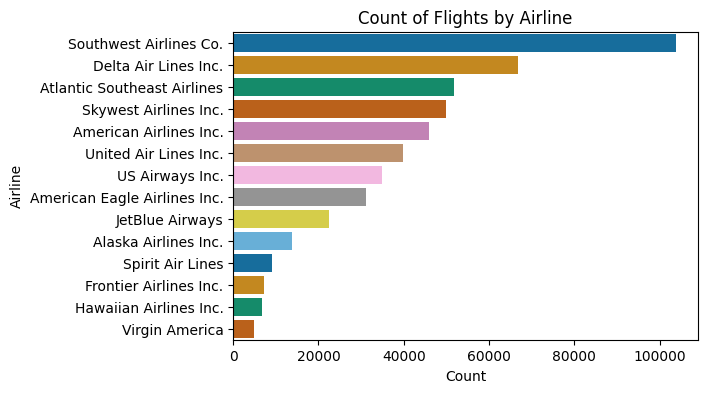

In [216]:
#get the count of all unqiue airlines
airline_counts = df['al_fullname'].value_counts().sort_values(ascending=False)

# Create a bar chart using seaborn
plt.figure(figsize=(6, 4))
sns.color_palette("colorblind")
plt.title("Count of Flights by Airline")
sns.barplot(x=airline_counts.values, y=airline_counts.index,palette="colorblind")
plt.xlabel("Count")
plt.ylabel("Airline")
plt.show()

Spothwest Airlines Co. seems like the most popular choice based on number of flights followed by Delta Airlines Inc. Virgin America seems to have the least number of flights taken in 2015.

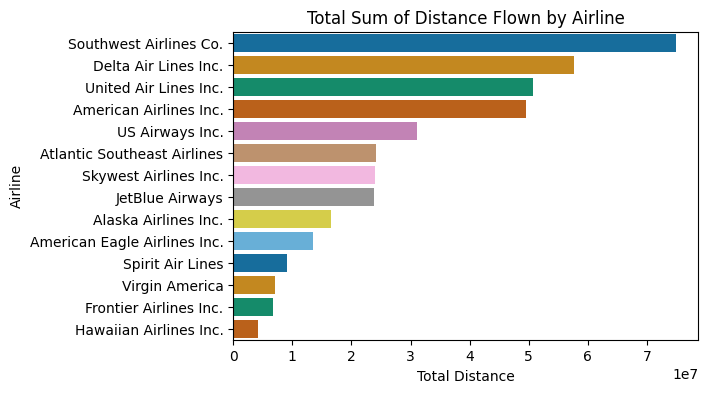

In [217]:
#calculate total distance, and plot
airline_sum_distance = df.groupby('al_fullname')['distance'].sum().sort_values(ascending=False)
# Create a bar plot using seaborn
plt.figure(figsize=(6,4))
sns.barplot(x=airline_sum_distance.values, y=airline_sum_distance.index, palette="colorblind")
plt.title("Total Sum of Distance Flown by Airline")
plt.xlabel("Total Distance")
plt.ylabel("Airline")
plt.show()

According to the length of distance travelled, Spothwest Airlines Co., Delta Air lines Inc. and  United Air lines Inc. have flown over the longest distances in 2015. Hawaiian Airlines Inc. have covered the least distance in the same year.

<Axes: ylabel='Frequency'>

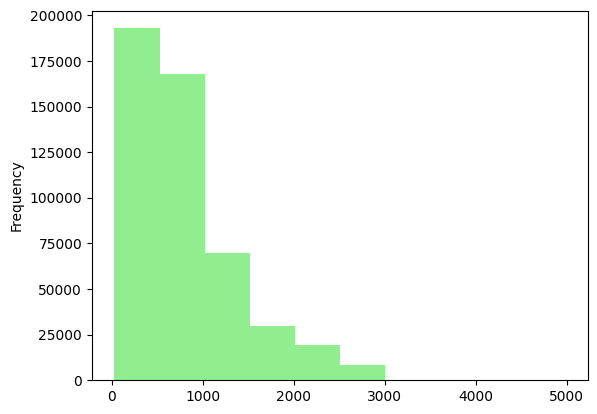

In [218]:
df['distance'].plot(kind = 'hist', color='lightgreen')

According to the above histogram, the max flights taken had covered a distanve less than 1000 miles. Let's create a categorical variable to understand each airline's relationship with distance.

In [219]:
# function that assigns 'short' 'medium' or 'long' based on distance

def dist_cat(x):
    if x < 1000:
        return 'short'
    elif 1000 <= x <= 2000:
        return 'medium'
    return 'long'

# create dist type column and count # of short/med/long flights

df['dist_type'] = df['distance'].apply(dist_cat)
df['dist_type'].value_counts()

dist_type
short     353597
medium    106102
long       28916
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='al_fullname'>

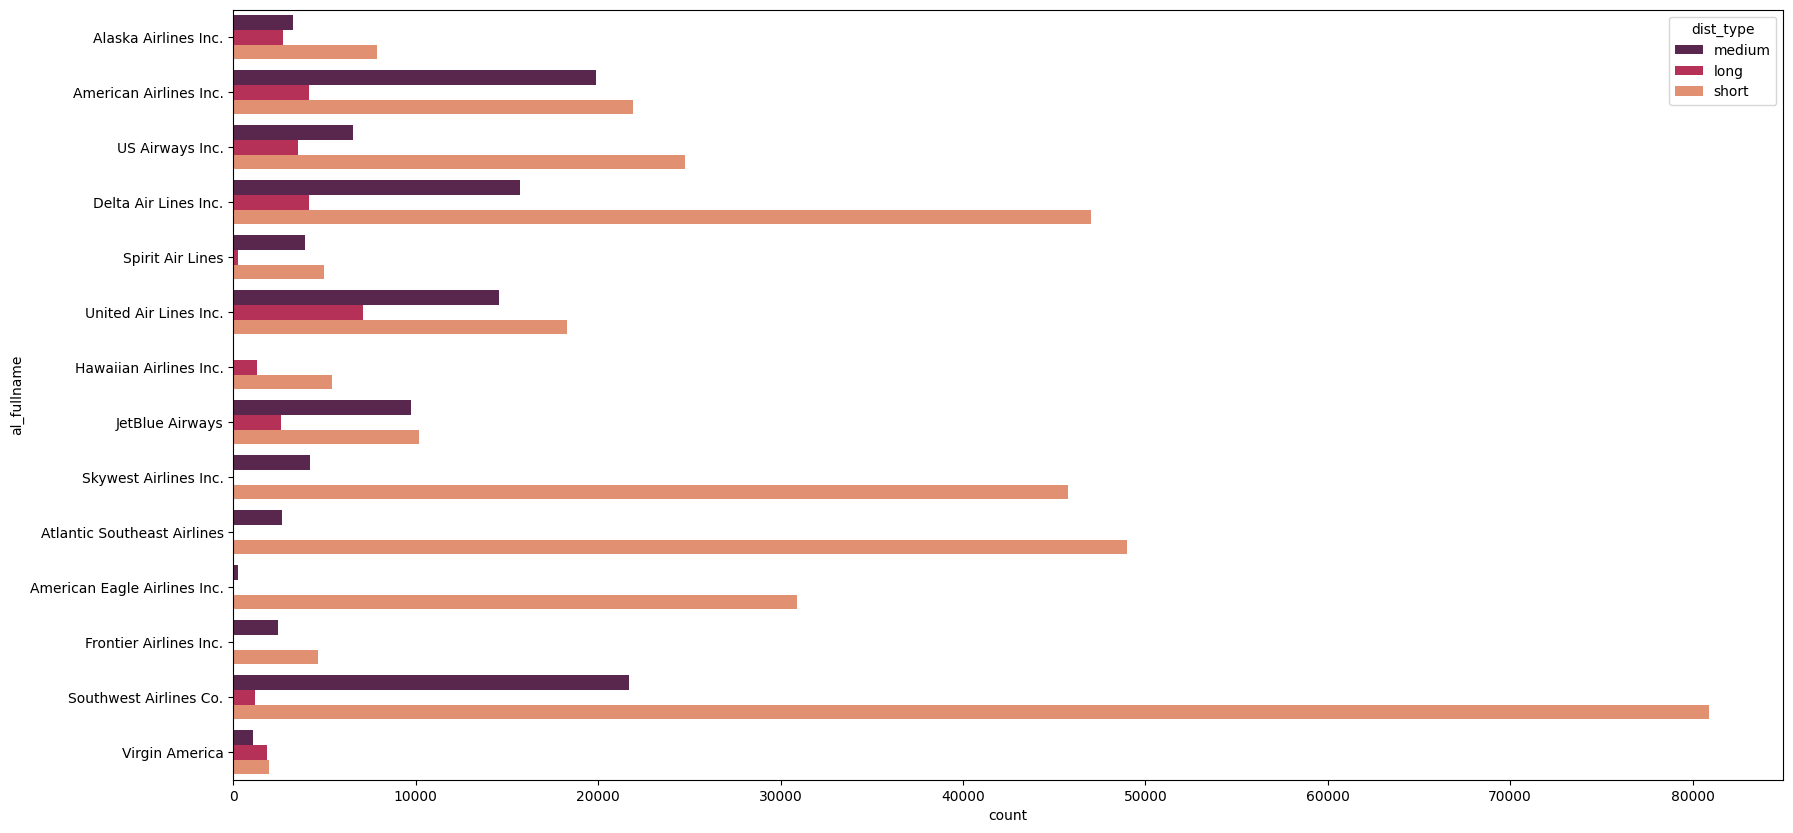

In [220]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df, y ='al_fullname',hue='dist_type',palette="rocket")

We observe that most of the flights of Southwest Airlines are short range (less than 100 miles). Infact among all the airlines, short range travel is the most popular, followed by medium and then long distance.

 ### In terms of delays, how does each airline perform?

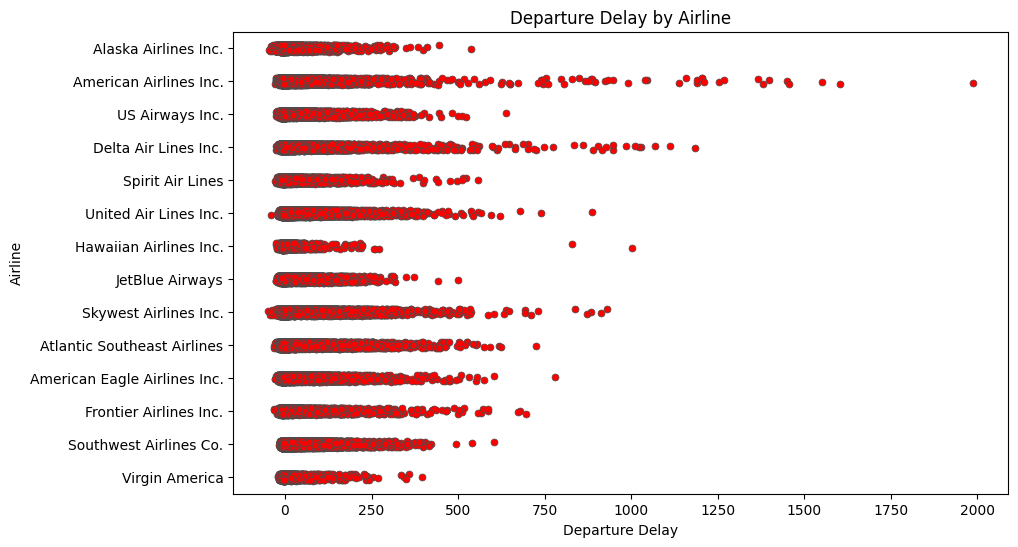

In [221]:
plt.figure(figsize=(10, 6))
sns.stripplot(y="al_fullname", x="departure_delay", data=df, linewidth = 0.5,  jitter=True, color='red')
plt.title("Departure Delay by Airline")
plt.xlabel("Departure Delay")
plt.ylabel("Airline")
plt.show()

Text(0.5, 0, 'Average Delay [@Departure: blue, @Arrival: hatch lines]')

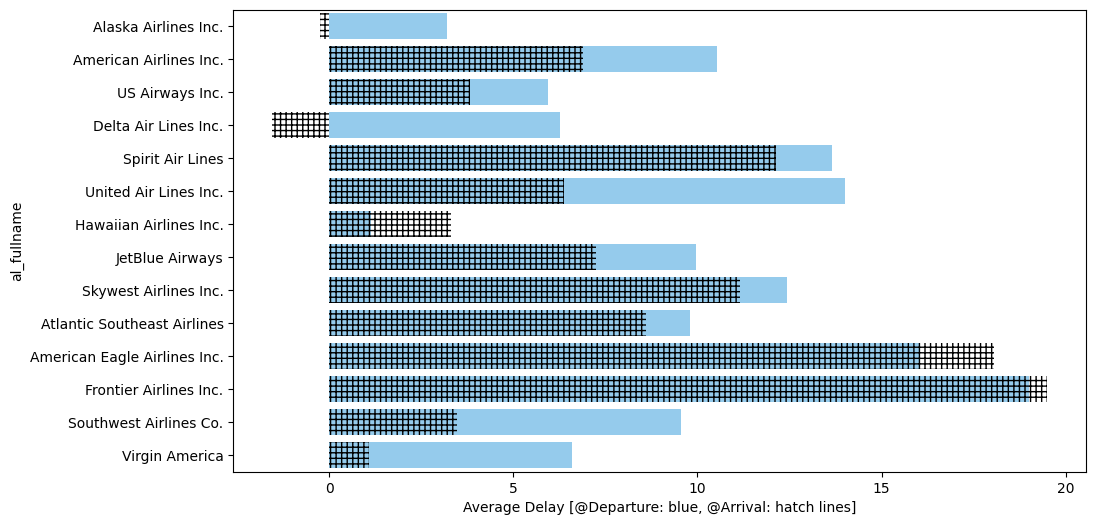

In [222]:
fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="departure_delay", y="al_fullname", data=df, color="lightskyblue", ci=None)
ax = sns.barplot(x="arrival_delay", y="al_fullname", data=df, hatch = '+++', alpha = 0.0, ci=None)
plt.xlabel('Average Delay [@Departure: blue, @Arrival: hatch lines]')

In [223]:
df.groupby(['al_fullname'])['departure_delay'].mean().sort_values(ascending = False).reset_index()

,al_fullname,departure_delay
0,Frontier Airlines Inc.,19.011399
1,American Eagle Airlines Inc.,16.011028
2,United Air Lines Inc.,14.007054
3,Spirit Air Lines,13.662104
4,Skywest Airlines Inc.,12.429472
5,American Airlines Inc.,10.527310
6,JetBlue Airways,9.972182
7,Atlantic Southeast Airlines,9.811786
8,Southwest Airlines Co.,9.555366
9,Virgin America,6.606036


In the bar plot above we're taking the average departure delay in light blue and imposing average arrival delay hatch lines to observe the net delay.

- American Eagle Airlines Inc. has the largest departure and arrival delay followed by Frontier Airlines Inc.
- Virgin America has the least departure delay and arrives earliered than the scheduled time.


In [224]:
df.groupby(['destination_city'])['arrival_delay'].mean().sort_values().nlargest(10)

destination_city
Marquette           44.076923
Waterloo            32.020408
Jamestown           30.060606
Champaign/Urbana    30.000000
Mosinee             28.900901
Devils Lake         28.357143
North Bend          27.529412
Toledo              26.870130
Sioux City          25.924528
Trenton             25.677966
Name: arrival_delay, dtype: float64

Text(0, 0.5, 'Arrival Delay')

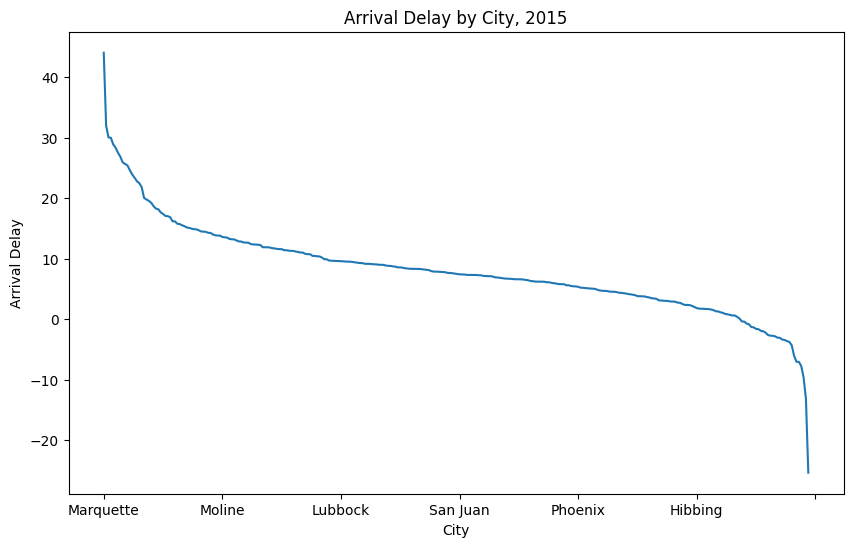

In [225]:
plt.figure(figsize=(10, 6))
df.groupby(['destination_city'])['arrival_delay'].mean().sort_values(ascending = False).plot()
plt.title('Arrival Delay by City, 2015')
plt.xlabel('City')
plt.ylabel('Arrival Delay')

In [226]:
df.groupby(['origin_city'])['departure_delay'].mean().sort_values().nlargest(10)

origin_city
Devils Lake                33.911111
Jamestown                  33.046154
Iron Mountain/Kingsford    31.175439
North Bend                 28.352941
Crescent City              28.114754
State College              26.492063
Trenton                    26.220833
Eau Claire                 26.063492
Alpena                     25.653061
Arcata/Eureka              24.278146
Name: departure_delay, dtype: float64

Text(0, 0.5, 'Departure Delay')

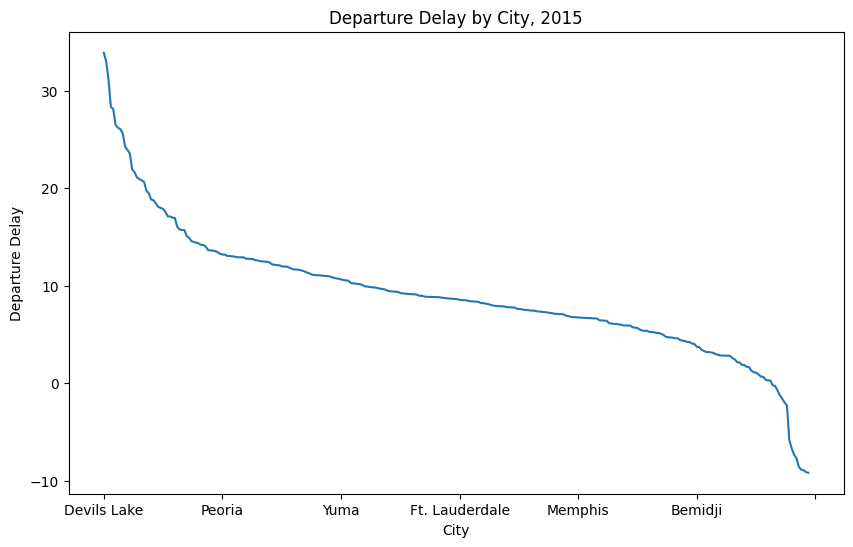

In [227]:
plt.figure(figsize=(10, 6))
df.groupby(['origin_city'])['departure_delay'].mean().sort_values(ascending = False).plot()
plt.title('Departure Delay by City, 2015')
plt.xlabel('City')
plt.ylabel('Departure Delay')

In [228]:
df.groupby(['destination_state'])['arrival_delay'].mean().sort_values().nlargest(10)

destination_state
IA    18.362354
GU    16.187500
ND    14.619048
WV    13.312500
AR    13.263292
IL    12.822397
KS    12.487939
SD    12.030717
DE    11.592593
VT    11.279661
Name: arrival_delay, dtype: float64

Text(0, 0.5, 'Arrival Delay')

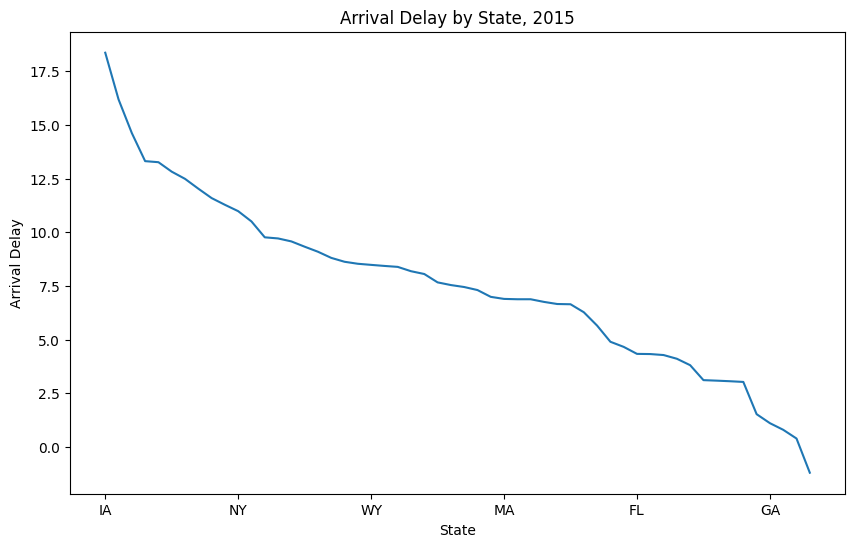

In [229]:
plt.figure(figsize=(10, 6))
df.groupby(['destination_state'])['arrival_delay'].mean().sort_values(ascending = False).plot()
plt.title('Arrival Delay by State, 2015')
plt.xlabel('State')
plt.ylabel('Arrival Delay')

In [230]:
df.groupby(['origin_state'])['departure_delay'].mean().sort_values().nlargest(10)

origin_state
DE    25.333333
IL    18.667049
IA    17.221271
CO    15.654713
ND    14.655585
WV    14.533333
SD    13.551881
GU    12.939394
NJ    12.882975
NY    12.642477
Name: departure_delay, dtype: float64

Text(0, 0.5, 'Departure Delay')

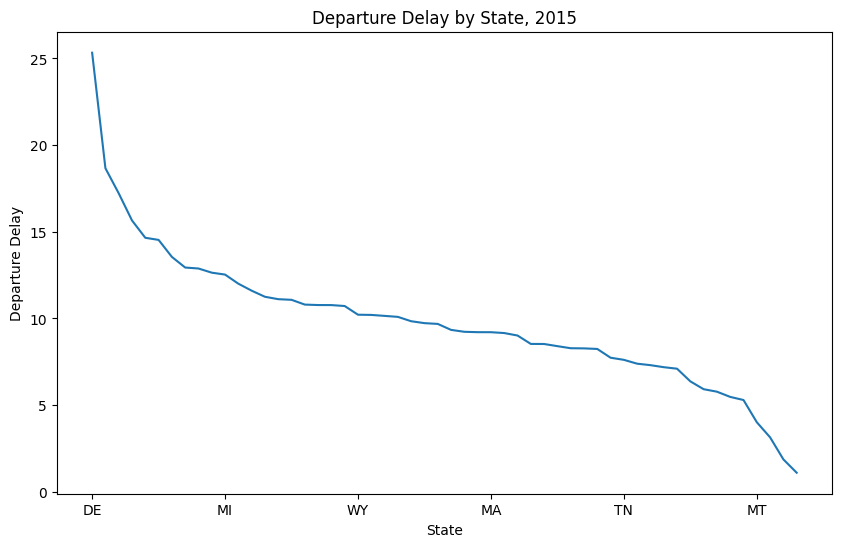

In [231]:
plt.figure(figsize=(10, 6))
df.groupby(['origin_state'])['departure_delay'].mean().sort_values(ascending = False).plot()
plt.title('Departure Delay by State, 2015')
plt.xlabel('State')
plt.ylabel('Departure Delay')

In [232]:
#arrival + departure delays by airport
df['late_arrival'] = [1 if x >= 15 else 0 for x in df['arrival_delay']]
df['late_departure'] = [1 if x >= 15 else 0 for x in df['departure_delay']]

In [233]:
# Top 10 destination airports with the largest average number of flights delayed
df.groupby('destination_airport')['late_arrival'].mean().sort_values().nlargest(10)

destination_airport
MQT    0.444444
IAG    0.406250
CMI    0.395349
TTN    0.393574
OTH    0.388889
GUM    0.375000
BPT    0.371134
COU    0.367188
GUC    0.367089
SUX    0.366667
Name: late_arrival, dtype: float64

In [234]:
# Top 10 origin airports with the largest average number of flights delayed
df.groupby('origin_airport')['late_departure'].mean().sort_values().nlargest(10)

origin_airport
GUM    0.454545
OTH    0.388889
UST    0.375000
BPT    0.340206
TTN    0.330677
ASE    0.325688
CEC    0.317460
JMS    0.307692
PBG    0.303030
ORD    0.300160
Name: late_departure, dtype: float64

### Change in airline performance change over the months of the year

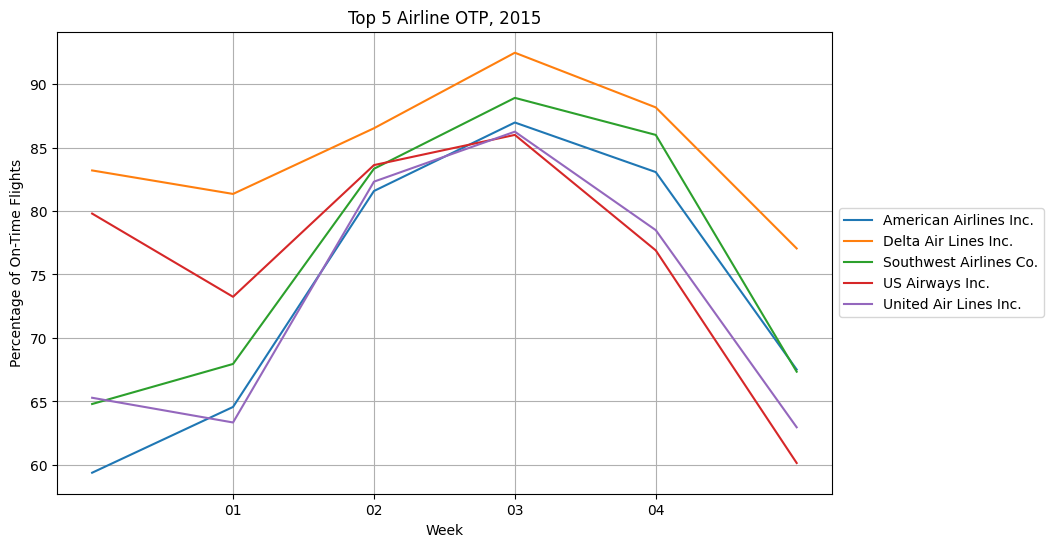

In [235]:
#calculate the percentage of on-time flights by month. (I assume on time to be no more than 15 minutes late)
on_time_performance = df.groupby(['al_fullname', 'week_number'])[['arrival_delay']].apply(lambda x: ((x <= 15).sum() / len(x)) * 100)
on_time_performance = on_time_performance.reset_index()

#subset the top 5 airlines
top_5 = df.groupby('al_fullname')['distance'].sum().sort_values(ascending = False).head(5)
top_5 = pd.DataFrame(top_5)

on_time_performance = on_time_performance[on_time_performance.al_fullname.isin(top_5.index)]

#reshape the data for plotting
pivot_table = on_time_performance.pivot(index='week_number', columns='al_fullname', values='arrival_delay')

#line plot of on-time performance by month
pivot_table.plot(kind='line', figsize=(10, 6))
plt.title('Top 5 Airline OTP, 2015')
plt.xlabel('Week')
plt.ylabel('Percentage of On-Time Flights')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(range(1, 5))
plt.grid(True)
plt.show()

In [236]:
# calculate average and standard deviation of arrival delay
df.groupby(['al_fullname'])['arrival_delay'].agg(['mean','std']).reset_index()

,al_fullname,mean,std
0,Alaska Airlines Inc.,-0.235976,31.157599
1,American Airlines Inc.,6.897797,49.976459
2,American Eagle Airlines Inc.,18.049056,47.925271
3,Atlantic Southeast Airlines,8.615612,41.894105
4,Delta Air Lines Inc.,-1.546391,37.508827
5,Frontier Airlines Inc.,19.493720,58.748486
6,Hawaiian Airlines Inc.,3.322557,25.840077
7,JetBlue Airways,7.235242,37.264288
8,Skywest Airlines Inc.,11.161386,45.725323
9,Southwest Airlines Co.,3.461532,30.312586


 ### Which routes have the highest probability of being canceled?

In [237]:
df['cancelled'].value_counts(normalize=True) * 100

cancelled
0.0    96.906351
1.0     3.093649
Name: proportion, dtype: float64

For all observations, it looks like the average cancellation rate is around 1.6 %

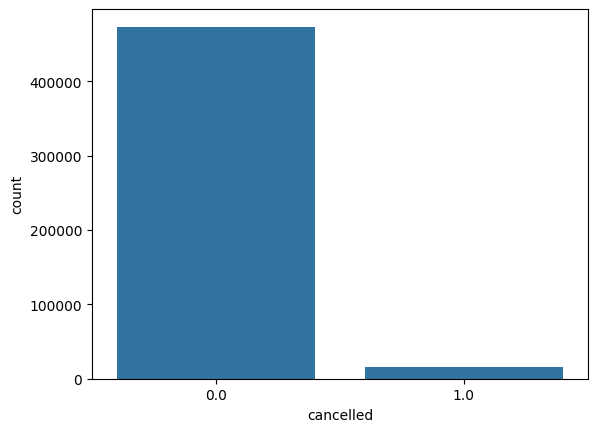

In [238]:
sns.countplot(x='cancelled', data = df)
plt.show()

### Cancellation rate by Airline

In [239]:
df.groupby(['al_fullname'])['cancelled'].mean().sort_values(ascending = False).reset_index()

,al_fullname,cancelled
0,American Eagle Airlines Inc.,0.091315
1,JetBlue Airways,0.055467
2,Atlantic Southeast Airlines,0.042987
3,US Airways Inc.,0.033239
4,United Air Lines Inc.,0.031777
5,Skywest Airlines Inc.,0.030569
6,American Airlines Inc.,0.027072
7,Southwest Airlines Co.,0.023034
8,Virgin America,0.021242
9,Frontier Airlines Inc.,0.015862


- Is there a specific time of day and/or time of year with a greater cancellation rate?
- Which routes have the greatest cancellation rate?

In [240]:
# group origin-destination pairs as 'route'
df['route'] = df['origin_airport'] + '-' + df['destination_airport']

In [248]:
df.groupby(['route'])['cancelled'].count().sort_values(ascending = False).reset_index()

,route,cancelled
0,JFK-LAX,1191
1,LAX-JFK,1189
2,SFO-LAX,1158
3,LAX-SFO,1144
4,LAS-LAX,995
...,...,...
4174,CWA-MSP,1
4175,GSO-CLT,1
4176,MMH-DEN,1
4177,PHX-DSM,1


In [241]:
df.head()

,month,day,day_of_week,airline,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,scheduled_time,...,date,week_number,dow_name,season,scheduled_departure_datetime,sched_hour,dist_type,late_arrival,late_departure,route
0,1,1.0,4.0,AS,ANC,SEA,00:05:00,23:54:00,-11.0,205.0,...,2015-01-01,00,Thursday,winter,2015-01-01 00:05:00,00,medium,0,0,ANC-SEA
1,1,1.0,4.0,AA,LAX,PBI,00:10:00,00:02:00,-8.0,280.0,...,2015-01-01,00,Thursday,winter,2015-01-01 00:10:00,00,long,0,0,LAX-PBI
2,1,1.0,4.0,US,SFO,CLT,00:20:00,00:18:00,-2.0,286.0,...,2015-01-01,00,Thursday,winter,2015-01-01 00:20:00,00,long,0,0,SFO-CLT
3,1,1.0,4.0,AA,LAX,MIA,00:20:00,00:15:00,-5.0,285.0,...,2015-01-01,00,Thursday,winter,2015-01-01 00:20:00,00,long,0,0,LAX-MIA
4,1,1.0,4.0,AS,SEA,ANC,00:25:00,00:24:00,-1.0,235.0,...,2015-01-01,00,Thursday,winter,2015-01-01 00:25:00,00,medium,0,0,SEA-ANC


Text(0, 0.5, 'Cancellation Count')

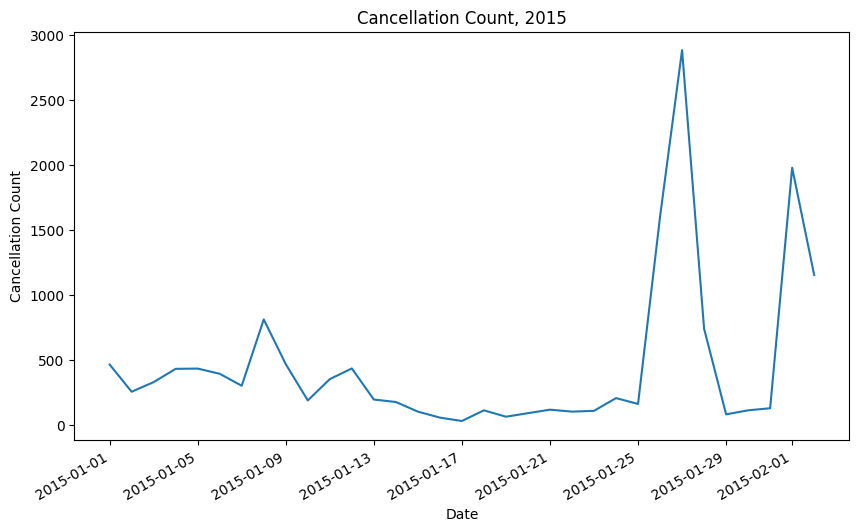

In [242]:
plt.figure(figsize=(10, 6))
df.groupby(['date'])['cancelled'].sum().sort_values(ascending = False).plot()
plt.title('Cancellation Count, 2015')
plt.xlabel('Date')
plt.ylabel('Cancellation Count')

In [243]:
df['month'].nunique()

2

In [244]:
df.groupby('month')['cancelled'].sum()

month
1    11982.0
2     3134.0
Name: cancelled, dtype: float64

We have data of 2 months only which isnt enough to decipher the trends

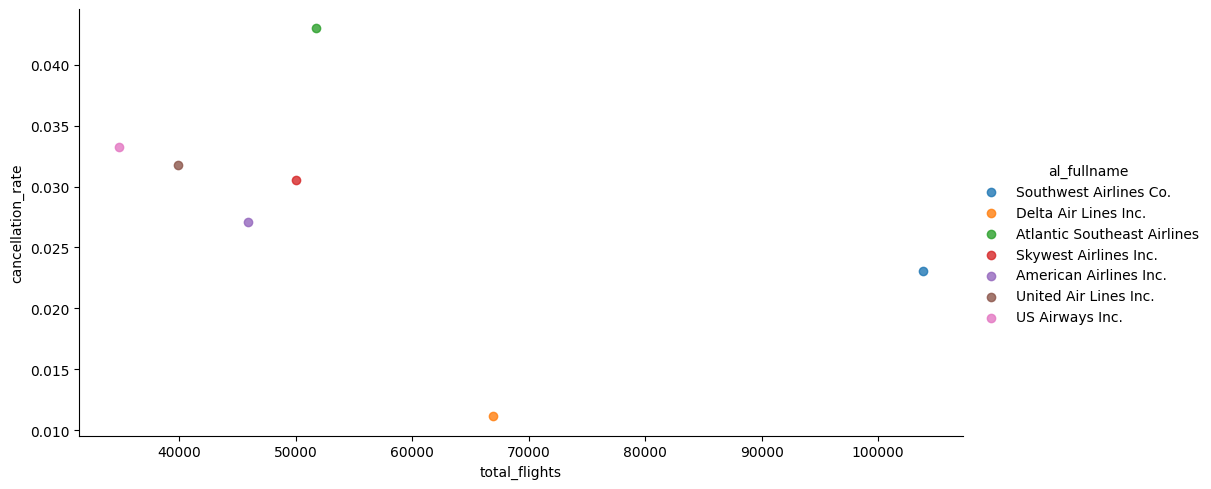

In [245]:
# Count number of cancellations and flights for each airline
df_cancelled = df.groupby('al_fullname')['cancelled'].agg(['sum','count']).rename(columns = {'sum':'total_cancelled', 'count':'total_flights'})
df_cancelled['cancellation_rate'] = df_cancelled['total_cancelled']/df_cancelled['total_flights']


sns.lmplot(data = df_cancelled.reset_index().nlargest(7, 'total_flights'),
           x = 'total_flights', y = 'cancellation_rate', hue = 'al_fullname',
           fit_reg = False, aspect = 2)

- There is no correaltion between total flights taken and cancellation rate
- Airline size doesn't necessarily correlate with lower cancellation rates

In [246]:
# get average cancellations by day of week
dow_canc = df.groupby(['dow_name'])['cancelled'].mean().reset_index().rename(columns={'cancelled': 'cancellation_mean'})
dow_canc['cancellation_mean'] = dow_canc['cancellation_mean']

# get count of flights by day of week
dow_count = df.groupby(['dow_name'])['cancelled'].count().reset_index().rename(columns={'cancelled': 'flight_count'})

# merge dataframes and print
canc_df = pd.merge(dow_canc, dow_count, on = 'dow_name')
canc_df.sort_values(by = 'flight_count')

,dow_name,cancellation_mean,flight_count
5,Tuesday,0.058649,60837
6,Wednesday,0.021596,62141
2,Saturday,0.013886,64165
1,Monday,0.053222,69407
3,Sunday,0.041635,73087
4,Thursday,0.020123,78022
0,Friday,0.012451,80955


Text(0, 0.5, 'Cancellation Count')

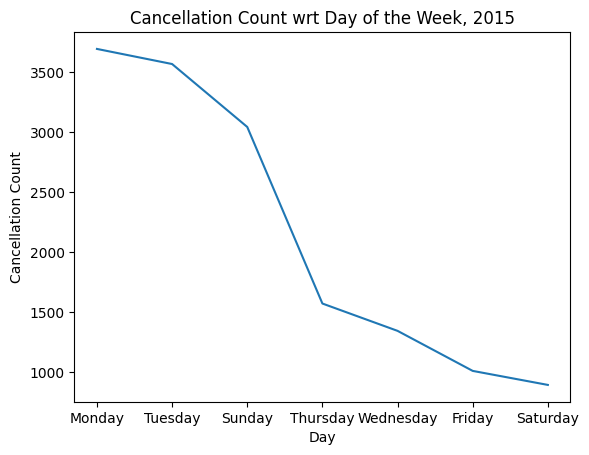

In [247]:
df.groupby(['dow_name'])['cancelled'].sum().sort_values(ascending = False).plot()
plt.title('Cancellation Count wrt Day of the Week, 2015')
plt.xlabel('Day')
plt.ylabel('Cancellation Count')

From the table above we can see that in the aggregate Monday's have athe highest cancellation rate of 6.6%, while Friday how the lowest cancellation rate.

In [249]:
df.groupby(['origin_airport'])['cancelled'].count().sort_values(ascending = False).reset_index()

,origin_airport,cancelled
0,ATL,30552
1,ORD,24387
2,DFW,24074
3,LAX,18052
4,DEN,17712
...,...,...
308,OTH,18
309,UST,16
310,ADK,10
311,PPG,10


In [250]:
df.groupby(['destination_airport'])['cancelled'].count().sort_values(ascending = False).reset_index()

,destination_airport,cancelled
0,ATL,30675
1,ORD,24474
2,DFW,24170
3,LAX,18033
4,DEN,17752
...,...,...
308,OTH,18
309,UST,16
310,ADK,10
311,PPG,10



### **US Airlines Flight Delays and Cancellations Analysis:**
1. Which airline had the highest percentage of delayed or cancelled flights in 2015?
- American Eagle Airlines Inc. has the largest departure and arrival delay followed by Frontier Airlines Inc.
- Atlantic Southeast Airlines have the highest cancellation rate while Delta Airlines Inc. have the lowest cancellation rate.

2. Which airports had the most flight cancellations?
- Hartsfield-Jackson Atlanta International Airport (ATL) had the maximum number of cancellations by origin and destination.
- Interms of route: LAX-JFK, JFK-LAX and SFO-LAX had maximum cancellations.

3. Are there any geographical patterns in flight delays? Do certain regions or airports experience more delays than others?
- Interms of States of US, Iowa and Delaware has the greatest arrival and departure delay respectively in 2015.
- While analysing the cities, Marquette (Wisconson) and Devils Lake (Wisconsin) have the highest arrival and departure delay respectively.

4. What was the average flight delay for each day of the week? Are weekends or weekdays more prone to delays?
- Monday's have the highest cancellation rate of 0.067, while Friday how the lowest cancellation rate.
- No trend is observed to correlate cancellations with weekends or weekdays.


## **American airline flights Cancellation Prediction**

In [251]:
# subset df to include only american airline flights
al_df = df[(df['airline'] == 'AA')]

# removing columns where data isn't available(e.g. departure delay isn't known for cancelled flight)
relevant_cols = ['cancelled','month','day_of_week','distance','scheduled_time', 'route', 'sched_hour']
al_df = al_df[relevant_cols]

In [252]:
al_df.head()

,cancelled,month,day_of_week,distance,scheduled_time,route,sched_hour
1,0.0,1,4.0,2330.0,280.0,LAX-PBI,00
3,0.0,1,4.0,2342.0,285.0,LAX-MIA,00
8,0.0,1,4.0,1464.0,195.0,SFO-DFW,00
11,0.0,1,4.0,2174.0,268.0,LAS-MIA,00
21,0.0,1,4.0,2724.0,338.0,SEA-MIA,01


In [253]:
# Encode day of week, route, hour, month
day_en = pd.get_dummies(al_df['day_of_week'], prefix = 'day')
route_en = pd.get_dummies(al_df['route'], prefix = 'route')
month_en = pd.get_dummies(al_df['month'], prefix = 'month')
hour_en = pd.get_dummies(al_df['sched_hour'], prefix = 'hour')


#concat dummy vars to dataframe
al_df = pd.concat([al_df, day_en, month_en, hour_en, route_en], axis = 1)
al_df = al_df.drop(columns = ['month','day_of_week', 'route', 'sched_hour'])

In [254]:
al_df.head()

,cancelled,distance,scheduled_time,day_1.0,day_2.0,day_3.0,day_4.0,day_5.0,day_6.0,day_7.0,...,route_STX-MIA,route_TPA-DFW,route_TPA-LAX,route_TPA-MIA,route_TPA-ORD,route_TUL-DFW,route_TUL-MIA,route_TUL-ORD,route_TUS-DFW,route_TUS-ORD
1,0.0,2330.0,280.0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.0,2342.0,285.0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,0.0,1464.0,195.0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,0.0,2174.0,268.0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21,0.0,2724.0,338.0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [255]:
#split data into features + target
X= al_df.drop('cancelled', axis=1)
y = al_df.cancelled

In [256]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# split feature and target data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=60)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [257]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.97


In [258]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[13388     2]
 [  374    11]]


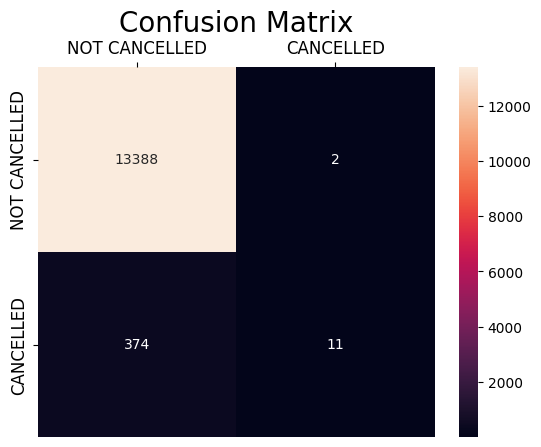

In [259]:
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, ax = ax, fmt = 'g');
ax.set_title('Confusion Matrix', fontsize=20)

ax.xaxis.set_ticklabels(['NOT CANCELLED', 'CANCELLED'], fontsize = 12)
ax.xaxis.tick_top()

ax.yaxis.set_ticklabels(['NOT CANCELLED', 'CANCELLED'], fontsize = 12)
plt.show()

In [260]:
print(classification_report(y_test, y_pred, target_names=["NOT CANCELLED", "CANCELLED"]))

               precision    recall  f1-score   support

NOT CANCELLED       0.97      1.00      0.99     13390
    CANCELLED       0.85      0.03      0.06       385

     accuracy                           0.97     13775
    macro avg       0.91      0.51      0.52     13775
 weighted avg       0.97      0.97      0.96     13775



Based on the results of your logistic regression model for predicting American airline flight cancellations, here's an interpretation of the performance metrics:

- **Precision**:
  - For the "NOT CANCELLED" class: 97% of the flights predicted as not cancelled were indeed not cancelled.
  - For the "CANCELLED" class: Only 85% of the flights predicted as cancelled were actually cancelled. This indicates a relatively high false positive rate.

- **Recall**:
  - For the "NOT CANCELLED" class: 100% of the actual not cancelled flights were correctly identified.
  - For the "CANCELLED" class: Only 3% of the actual cancelled flights were correctly identified. This indicates a low rate of true positives, meaning many cancelled flights were missed by the model.

- **F1-score**:
  - The F1-score is a balance between precision and recall. For the "CANCELLED" class, the low recall contributes to a very low F1-score, indicating poor performance in correctly identifying cancelled flights.

- **Accuracy**:
  - Overall accuracy of the model is 97%, which is high. However, given the class imbalance (with very few cancelled flights compared to not cancelled flights), accuracy alone may not be a reliable measure of model performance.

- **Macro Avg / Weighted Avg**:
  - The macro average and weighted average of precision, recall, and F1-score provide an overall summary of model performance across both classes. In this case, they indicate that the model's performance is significantly better for the "NOT CANCELLED" class compared to the "CANCELLED" class.

Based on these metrics, it's evident that while the model performs well in predicting not cancelled flights, it struggles to accurately identify cancelled flights. This could be due to the class imbalance, where there are far fewer examples of cancelled flights in the dataset compared to not cancelled flights. Further optimization of the model or exploration of different machine learning algorithms may be necessary to improve its performance, especially in correctly predicting flight cancellations. Additionally, considering techniques such as resampling or adjusting class weights could help address the class imbalance issue and potentially improve model performance.


 Here are some key takeaways of the analysis:

1. **Airline Performance**:
   - American Eagle Airlines Inc. and Frontier Airlines Inc. had the highest percentage of delayed or cancelled flights.
   - Atlantic Southeast Airlines had the highest cancellation rate, while Delta Airlines Inc. had the lowest.

2. **Airport Analysis**:
   - Hartsfield-Jackson Atlanta International Airport (ATL) experienced the most flight cancellations, both by origin and destination.
   - Routes such as LAX-JFK, JFK-LAX, and SFO-LAX had the highest number of cancellations.

3. **Geographical Patterns**:
   - Certain states and cities, such as Iowa and Delaware, Marquette (Wisconsin), and Devils Lake (Wisconsin), experienced higher arrival and departure delays.
   - This highlights potential regional factors contributing to flight delays.

4. **Day of the Week Analysis**:
   - Monday had the highest cancellation rate, while Friday had the lowest.
   - There doesn't seem to be a clear trend correlating cancellations with weekends or weekdays, suggesting that other factors may influence flight cancellations.

Overall, your analysis provides a comprehensive overview of the factors contributing to flight delays and cancellations in 2015, highlighting areas for improvement in airline operations and airport management. Further exploration and analysis could involve investigating the reasons behind specific airline or airport performance, identifying potential solutions to minimize disruptions, and assessing the impact of external factors such as weather on flight operations.

